# LDA — Project 1: Iris Dataset (Basic)
_Linear Discriminant Analysis (LDA) with classic multi-class separation and visualization_

## Introduction & Dataset Chosen

**Dataset:** Fisher’s Iris (via scikit-learn)  
- **Source:** UCI Machine Learning Repository (packaged in `sklearn.datasets`)  
- **Size:** 150 samples, 4 numeric features  
- **Features:** sepal length, sepal width, petal length, petal width (all in cm)  
- **Target:** species — *setosa*, *versicolor*, *virginica* (3 classes, 50 samples each)  
- **Problem Type:** Multi-class classification (balanced)  

**Why this dataset for LDA?**  
- LDA seeks linear combinations of features that best separate classes.  
- Iris is a well-studied benchmark where classes exhibit meaningful linear separability (especially *setosa*).  
- Small, clean, and interpretable — perfect for demonstrating LDA’s decision boundaries and discriminant axes.  

### Step 1: Loading The Dataset

In [1]:
# Load Iris dataset (intro only)
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris(as_frame=True)
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Dataset summary
n_samples, n_features = X.shape
class_counts = pd.Series(y, name="class_id").map(dict(enumerate(target_names))).value_counts().sort_index()

print("DATASET SUMMARY")
print("----------------")
print(f"Samples: {n_samples}")
print(f"Features: {n_features} -> {list(feature_names)}")
print(f"Targets: {len(target_names)} -> {list(target_names)}")
print("\nPer-class sample counts:")
print(class_counts.to_string())

DATASET SUMMARY
----------------
Samples: 150
Features: 4 -> ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets: 3 -> ['setosa', 'versicolor', 'virginica']

Per-class sample counts:
class_id
setosa        50
versicolor    50
virginica     50


## What is Linear Discriminant Analysis (LDA)?

**Linear Discriminant Analysis (LDA)** is a supervised learning technique used for:
1. **Classification** → Assigning samples to the correct class.
2. **Dimensionality reduction** → Projecting data onto fewer axes that maximize class separation.

---

### How LDA Works (Intuition)
- LDA finds a **projection vector** `w` that maximizes:
  - **Between-class variance** (classes far apart).
  - **Within-class variance** (samples in same class tightly clustered).
- The idea is to make classes as distinct as possible in the new space.

---

### Mathematical Formulation

# Linear Discriminant Analysis (LDA)

We assume:

- $k$ classes  
- Mean vector of class $i$: $\mu_i$  
- Overall mean vector: $\mu$



---

## Scatter Matrices

**Within-class scatter:**

$$
S_W = \sum_{i=1}^{k} \sum_{x \in C_i} (x - \mu_i)(x - \mu_i)^T
$$

**Between-class scatter:**

$$
S_B = \sum_{i=1}^{k} n_i (\mu_i - \mu)(\mu_i - \mu)^T
$$

where $n_i$ is the number of samples in class $i$.

---

## Optimization Objective

The optimal projection \(W\) maximizes the ratio of the determinant of between-class scatter in the projected space to the within-class scatter:

$$
W = \underset{W}{\text{argmax}} \; \frac{| W^T S_B W |}{| W^T S_W W |}
$$

---

## Generalized Eigen

This optimization leads to solving the generalized eigenvalue problem:

$$
S_W^{-1} S_B W = \lambda W
$$

---

## Discriminant Axes

- The top eigenvectors of $S_W^{-1} S_B$ form the **discriminant axes**.  
- For $k$ classes, we obtain at most $k-1$ discriminants.

---

### Strengths
- Works well when classes are linearly separable.
- Computationally efficient (closed-form solution).
- Provides interpretable linear decision boundaries.
- Doubles as dimensionality reduction + classifier.

### Limitations
- Assumes:
  - Classes are normally distributed.
  - All classes share the same covariance matrix.
- Sensitive to outliers.
- Struggles with highly non-linear class boundaries.

---

## Assumptions of LDA

For Linear Discriminant Analysis (LDA) to perform optimally, several key assumptions should hold:

1. **Normality of Features**  
   - Features within each class are assumed to follow a **multivariate normal (Gaussian) distribution**.  
   - Small deviations are usually fine, but extreme skewness may reduce accuracy.


2. **Equal Covariance Matrices (Homoscedasticity)**  
   - All classes are assumed to share the **same covariance structure**.  
   - This implies that class boundaries will be **linear**.  
   - If violated, boundaries may be less accurate — Quadratic Discriminant Analysis (QDA) may work better.

3. **Independence Within Classes**  
   - Observations are assumed to be **independent** within each class.  
   - Violations (e.g., repeated measures) can bias variance estimates.


4. **No or Few Outliers**  
   - Outliers can distort mean and covariance estimates, pulling decision boundaries away from optimal.  
   - Detecting/removing outliers before applying LDA improves robustness.


5. **Balanced Classes (Ideal but not mandatory)**  
   - LDA works best when each class has **similar sample sizes**.  
   - Strong imbalance can bias the model toward majority classes.

---

## Purpose of the Project

### Real-world Motivation
Accurately classifying **Iris species** from basic flower measurements has multiple practical uses:
- **Botanical labs & universities:** Fast species ID during field studies and taxonomy classes.
- **Horticulture & nurseries:** Ensuring correct labeling for cultivation, pricing, and supply chain integrity.
- **Customs & biosecurity:** Quick screening to avoid invasive species mix-ups.
- **Data quality checks:** Using LDA’s low-dimensional projection to spot outliers/mismeasurements.

### What the Classifier Will Achieve
- **Predict species** (_setosa_, _versicolor_, _virginica_) from 4 easy-to-collect measurements.
- **Provide interpretable boundaries** via LDA’s linear discriminants, aiding explainability and QC.
- **Enable monitoring** (e.g., confidence scores) to flag uncertain samples for manual review.

### Success Criteria (KPIs)
- **Accuracy ≥ 95%** (baseline expectation for Iris with linear models).
- **Macro-F1 ≥ 0.95** (balanced performance across all 3 classes).
- **Low confusion** between *versicolor* and *virginica* (historically the trickiest pair).
- **Inference speed:** < 1 ms per sample on commodity hardware (practically instant for this dataset).

### Scope & Assumptions
- Measurements are clean and taken under standard protocols.
- No severe class imbalance (Iris is balanced at 50 samples/class).
- LDA is appropriate due to roughly Gaussian class distributions and linear separability tendencies.


## Step 2: EDA

## Exploratory Data Analysis (EDA)

Before modeling, let’s explore the Iris dataset to understand its structure and patterns:

- **Shape & Datatypes**: Verify rows, columns, and feature types.  
- **Nulls & Duplicates**: Ensure data quality.  
- **Descriptive Statistics**: Summary of central tendency & spread.  
- **Visualizations**: Histograms, boxplots, scatterplots, correlation heatmap.  
- **Class Distribution**: Check for balance across species.

In [2]:
import pandas as pd

print("=== BASIC STRUCTURE CHECKS ===")
print(f"Shape (rows, cols): {X.shape}")

print("\n--- Dtypes ---")
print(X.dtypes)

print("\n--- Null values per column ---")
print(X.isnull().sum())

# Duplicates only on features (X); if you need full-row duplicates including target, merge y first.
dup_count = X.duplicated().sum()
print(f"\nDuplicate rows in feature matrix: {dup_count}")


=== BASIC STRUCTURE CHECKS ===
Shape (rows, cols): (150, 4)

--- Dtypes ---
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

--- Null values per column ---
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Duplicate rows in feature matrix: 1


In [3]:
print("=== DESCRIPTIVE STATISTICS ===")
desc = X.describe().T  # transpose for readability
display(desc)

=== DESCRIPTIVE STATISTICS ===


,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


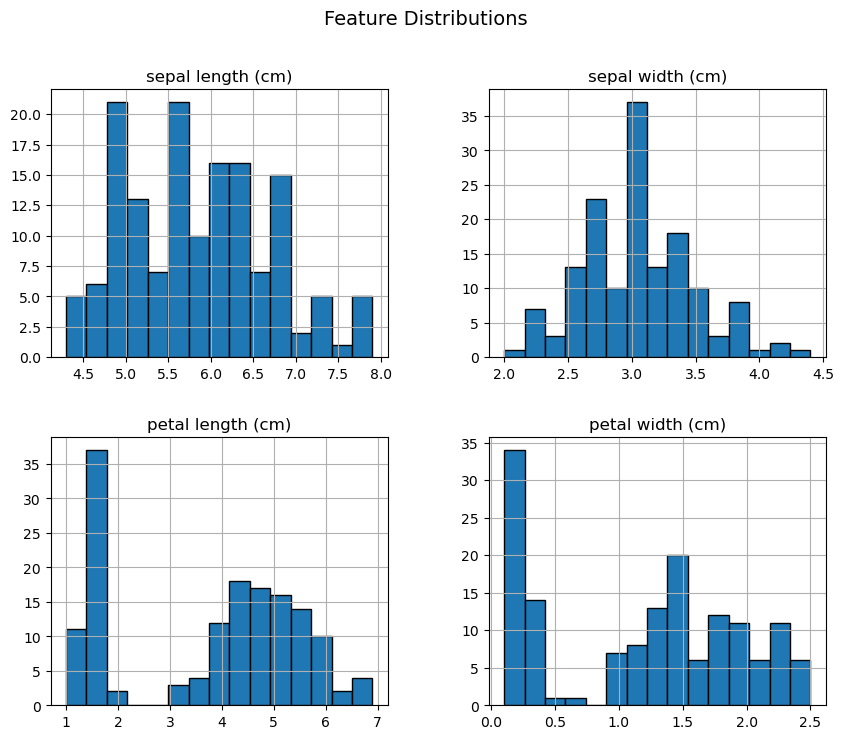

In [4]:
import matplotlib.pyplot as plt

ax = X.hist(figsize=(10, 8), bins=15, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

**Explanation:**  
- Look for **unimodal vs multimodal** shapes and whether features appear approximately **bell-shaped**.  
- Clear **separation** (e.g., petal length/width tends to separate *setosa* strongly) is helpful for **linear boundaries**.

### Insights from Feature Distributions

1. **Sepal Length (cm)**  
   - Spread mostly between **4.5 – 7 cm**, with a few values near 8.  
   - Distribution appears **multi-peaked**, suggesting overlap between species.  
   - On its own, not a strong discriminator.

2. **Sepal Width (cm)**  
   - Concentrated around **2.5 – 3.5 cm**.  
   - Relatively symmetric but with considerable overlap.  
   - Provides little discriminative power for class separation.

3. **Petal Length (cm)**  
   - Shows a clear **bimodal distribution**:  
     - Tight cluster around **1–2 cm** → corresponds to *Setosa*.  
     - Broader spread **3–6+ cm** → overlaps *Versicolor* and *Virginica*.  
   - Highly informative feature for distinguishing *Setosa* from the others.

4. **Petal Width (cm)**  
   - Displays the **clearest separation**:  
     - *Setosa*: **0–0.5 cm**.  
     - *Versicolor*: around **1–1.8 cm**.  
     - *Virginica*: **1.5–2.5 cm**.  
   - Strongest single feature for species classification.

---

### Overall Observations
- **Petal measurements** (length & width) are far more discriminative than **sepal measurements**.  
- **Setosa** is almost perfectly separable based on petal size.  
- **Versicolor** and **Virginica** overlap in mid-ranges, making them harder to separate.  
- No severe skew or extreme outliers → data is well-suited for LDA’s assumptions of normality and equal covariance.  

**Implication:** LDA should perform well overall, with the main challenge being the **linear boundary between Versicolor and Virginica**.


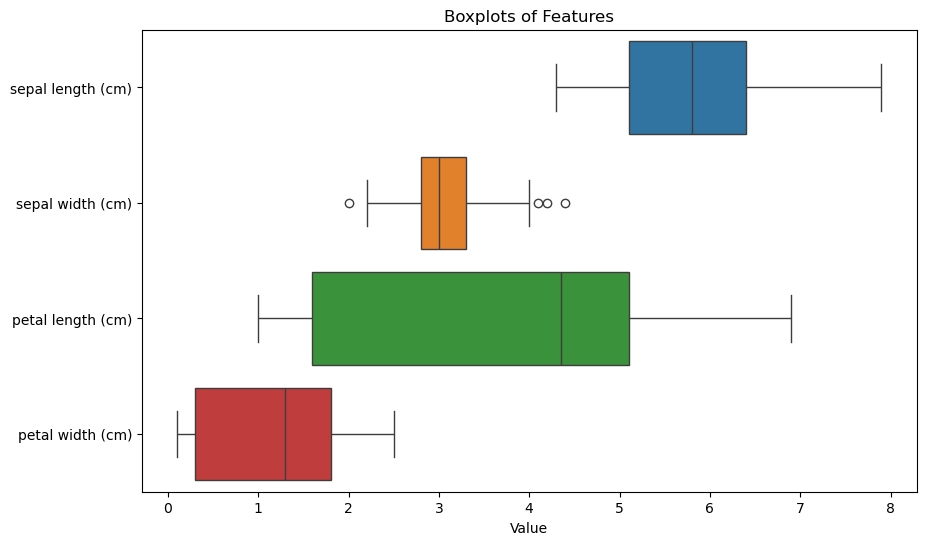

In [5]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=X, orient="h")
plt.title("Boxplots of Features")
plt.xlabel("Value")
plt.show()

**Explanation:**  
- **Whiskers** and **points beyond** indicate potential outliers.  
- LDA uses covariance estimates; **extreme outliers** can distort these and affect discriminants/decision boundaries.

### Insights from Boxplots

1. **Sepal Length (cm)**  
   - Range ~4.5 to 8.0 cm.  
   - Distribution looks fairly symmetric with **no extreme outliers**.  
   - Moderate spread, suggesting variability across species.  

2. **Sepal Width (cm)**  
   - Range ~2.0 to 4.5 cm.  
   - **A few outliers** on both the low and high end (~2.0 and >4.0).  
   - Otherwise fairly compact distribution.  
   - Since LDA is sensitive to outliers, these points may slightly influence covariance estimates.  

3. **Petal Length (cm)**  
   - Range ~1.0 to 7.0 cm.  
   - Wider spread compared to sepal features.  
   - Clear indication of **class-driven variability** (e.g., *setosa* vs *virginica*).  
   - No extreme outliers observed.  

4. **Petal Width (cm)**  
   - Range ~0.1 to 2.5 cm.  
   - Symmetric spread with **tight clustering at lower values (setosa)** and wider spread at higher values (*versicolor*, *virginica*).  
   - No visible outliers.  

---

### Overall Observations
- **Petal features (length & width)** show the largest variation and are likely the strongest discriminators.  
- **Sepal width** is the only feature with a few outliers — should be noted since LDA can be sensitive.  
- Boxplots confirm what we saw in histograms:  
  - *Setosa* is distinct (low petal values).  
  - *Versicolor* and *Virginica* overlap but with different spread ranges.  

➡️ **Implication for LDA:** Petal-based features will dominate the discriminant functions, while sepal width outliers might slightly affect model stability.


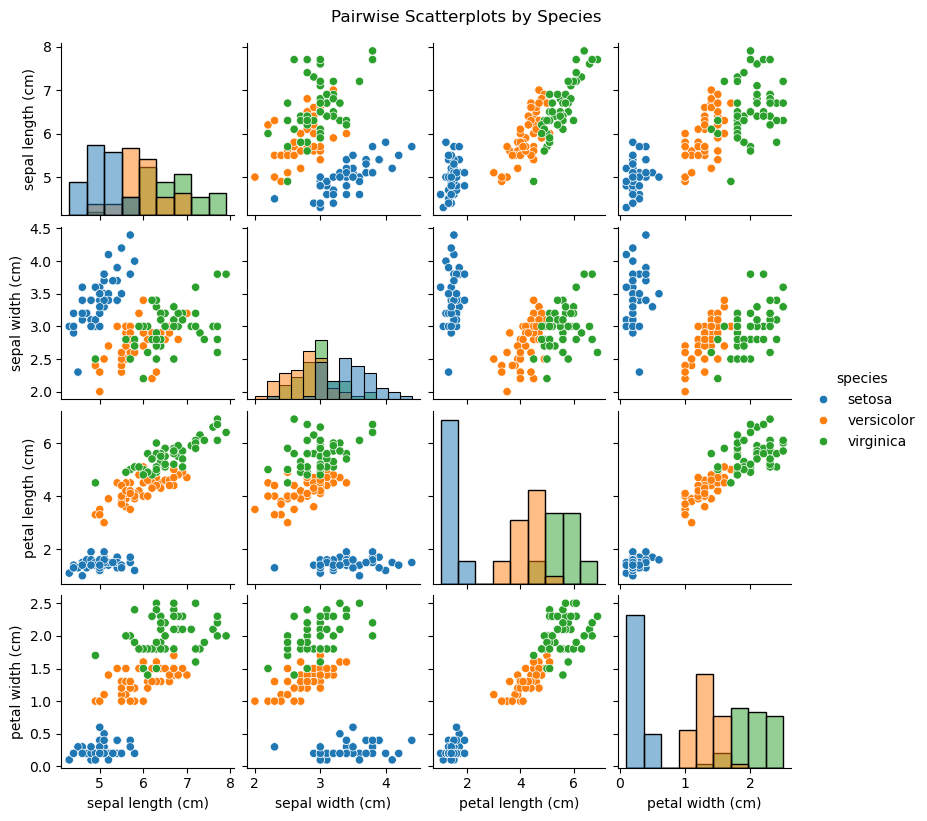

In [6]:
df_pair = pd.concat([
    X.reset_index(drop=True),
    y.map(dict(enumerate(target_names))).rename("species")
], axis=1)

sns.pairplot(df_pair, hue="species", diag_kind="hist", height=2.0)
plt.suptitle("Pairwise Scatterplots by Species", y=1.02)
plt.show()

**Explanation:**  
- Identify which **feature pairs** show clear **class separation**.  
- Typically, **petal length** and **petal width** separate *setosa* cleanly; **versicolor vs virginica** can be closer.  
- If clusters are roughly separable with **straight lines**, LDA is a good fit.

### Insights from Pairwise Scatterplots

1. **Setosa (blue)**
   - Forms a **distinct, tight cluster** in both petal length and petal width.  
   - Clear linear separation from *Versicolor* and *Virginica* — almost perfectly classified using petal features.  

2. **Versicolor (orange)**
   - Occupies the **middle range** of petal length (≈4–5.5 cm) and petal width (≈1–1.8 cm).  
   - Overlaps partially with *Virginica*, especially in petal dimensions.  
   - Still, trends are visible: Versicolor is generally smaller-petaled than Virginica.  

3. **Virginica (green)**
   - Clustered at higher petal length (>5 cm) and petal width (>1.5 cm).  
   - Overlap with Versicolor indicates the **main source of classification errors**.  

4. **Sepal features**
   - **Sepal length and width** show broad overlap across all species.  
   - Not strong discriminators on their own, though Sepal width helps in distinguishing Setosa slightly.  

---

### Overall Observations
- **Petal dimensions are the dominant separating features**:  
  - Petal length and petal width together provide the clearest linear separation.  
  - This supports the use of LDA since the classes are **linearly separable in 2D projection space**.  
- **Setosa** is almost trivially separable.  
- The main challenge is correctly classifying **Versicolor vs Virginica** due to overlapping regions.  

**Implication for LDA:** The algorithm should create two discriminant axes that emphasize **petal length/width** to achieve maximum class separation.

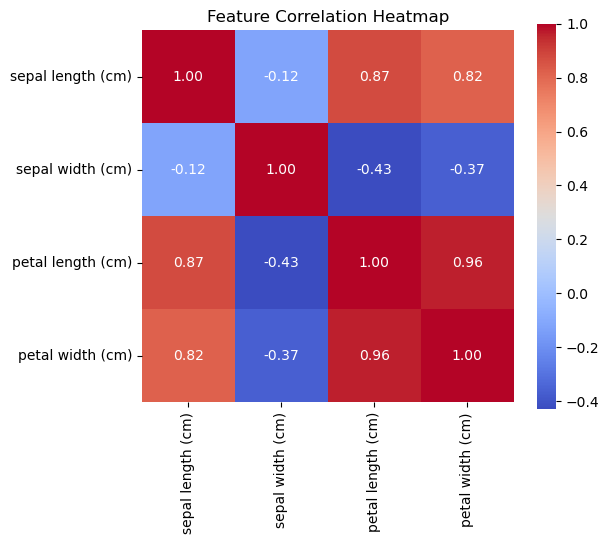

In [7]:
plt.figure(figsize=(6, 5))
corr = X.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

**Explanation:**  
- **High correlation** (e.g., between petal length and petal width) indicates **collinearity**.  
- LDA can handle correlated features, but extreme collinearity can make covariance matrices **ill-conditioned**; regularized LDA (`solver='lsqr', shrinkage='auto'`) can help if needed.

### Insights from Correlation Heatmap

1. **Strong Positive Correlations**
   - **Petal length vs petal width (0.96)** → almost perfectly correlated.  
   - **Sepal length vs petal length (0.87)** and **sepal length vs petal width (0.82)** → large positive associations.  
   - Indicates that as the flower gets larger overall, both petal and sepal length/width increase together.

2. **Negative Correlations**
   - **Sepal width vs petal length (-0.43)** and **sepal width vs petal width (-0.37)** → moderate negative relationships.  
   - Suggests that wider sepals don’t necessarily imply longer/broader petals.

3. **Low Correlation**
   - **Sepal length vs sepal width (-0.12)** → near independence.  
   - These features provide complementary (non-redundant) information.

---

### Overall Observations
- **High correlation among petal features**: Petal length and width provide overlapping information, which LDA may capture in a single discriminant.  
- **Sepal width behaves differently**, with weaker or negative correlations to petal features — could add diversity to the discriminant axes.  
- High correlations can sometimes cause **multicollinearity**, but LDA handles this reasonably well since it works with scatter matrices.  

**Implication for LDA:** Expect the first discriminant axis to be dominated by **petal length & petal width**, while the second axis may include **sepal width** to maximize class separation.


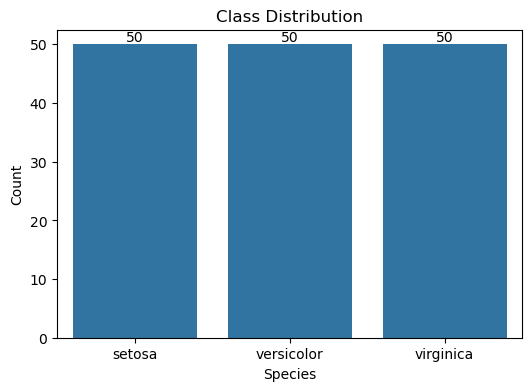

Counts per class:
 target
setosa        50
versicolor    50
virginica     50


In [8]:
plt.figure(figsize=(6, 4))
cls_counts = y.map(dict(enumerate(target_names))).value_counts().reindex(target_names)
sns.barplot(x=cls_counts.index, y=cls_counts.values)
plt.title("Class Distribution")
plt.xlabel("Species")
plt.ylabel("Count")
for idx, val in enumerate(cls_counts.values):
    plt.text(idx, val + 0.5, str(val), ha="center")
plt.show()

print("Counts per class:\n", cls_counts.to_string())

### Insights from Class Distribution

- Each species (*Setosa*, *Versicolor*, *Virginica*) has **exactly 50 samples**.  
- This makes the dataset **perfectly balanced** (equal class sizes).  
- No oversampling, undersampling, or class-weight adjustments are required.  
- Ensures that evaluation metrics like **accuracy, precision, recall, and F1** will not be biased toward a majority class.

---

### Overall Implications
- The balanced nature of the dataset makes it ideal for testing classifiers like **LDA**.  
- Performance differences will mostly reflect the **true separability** of the classes rather than dataset imbalance.  
- We expect **Setosa** to be classified with near-perfect accuracy, while the challenge remains in distinguishing **Versicolor vs Virginica**.


## Step 3: Data Preprocessing

## Data Preprocessing

**Goals:** verify data quality, handle potential issues, and prepare features for LDA.

**Missing values**  
- Iris is clean; no imputation required.

**Outliers**  
- Mild outliers appear in *sepal width* boxplot; nothing extreme.  
- We'll keep them (note: LDA can be mildly sensitive). Robust scaling could be a future tweak.

**Duplicates**  
- Some rows have identical feature values (natural repeats).  
- These are valid observations; removing them could distort class balance.  
- **Decision:** keep duplicates.

**Encoding**  
- Target already integer-encoded (0=setosa, 1=versicolor, 2=virginica).

**Scaling**  
- LDA relies on covariance; **StandardScaler** is recommended.

**Train/Test split**  
- 80/20 stratified split to preserve class proportions.

**Why keep duplicates?**  
- They are legitimate samples (different flowers with the same measurements).  
- Removing them can unbalance classes or bias the covariance estimation.

**Why scale?**  
- Ensures all features contribute comparably to LDA’s scatter matrices.



In [9]:
# Duplicate checks
iris_full = X.copy()
iris_full["species"] = y

dup_feat = X.duplicated().sum()
dup_full = iris_full.duplicated().sum()

print(f"Duplicate rows in FEATURES only: {dup_feat}")
print(f"Duplicate rows in FEATURES + TARGET: {dup_full}")

Duplicate rows in FEATURES only: 1
Duplicate rows in FEATURES + TARGET: 1


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)

# Standardize (fit on train, apply to train & test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

Train shape: (120, 4) | Test shape: (30, 4)


## Step 4) Model Building

## Model Building

We now train our chosen classifier: **Linear Discriminant Analysis (LDA).**

Steps:

**Import & Initialize LDA**  
   - Key hyperparameters:
     - `solver`: Algorithm to use. Options:
       - `"svd"` (default, robust, no shrinkage/scaling needed).
       - `"lsqr"` / `"eigen"` (support shrinkage, useful if features are highly correlated).
     - `shrinkage`: Regularization parameter (helps if covariance is ill-conditioned).  
   - For Iris, `solver="svd"` works well as a baseline.

**Hyperparameter Tuning (GridSearchCV)**  
   - Although LDA has few hyperparameters, we can try:
     - Different solvers (`"svd"`, `"lsqr"`, `"eigen"`).
     - Shrinkage (`None`, `"auto"`) for `lsqr`/`eigen`.
   - Use stratified cross-validation to evaluate performance.

**Fit on Training Data**  
   - Train the model using the scaled training features.

**Predict on Test Data**  
   - Generate predictions for the hold-out test set.


In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# Two disjoint grids to avoid invalid combinations
param_grid = [
    {"solver": ["svd"]},  # svd ignores/doesn't allow shrinkage
    {"solver": ["lsqr", "eigen"], "shrinkage": ["auto", None]},  # shrinkage allowed here
]

lda = LinearDiscriminantAnalysis()

# Optional: set error_score="raise" during debugging to catch mistakes early
grid = GridSearchCV(
    lda,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    error_score="raise"
)

grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

best_lda = grid.best_estimator_
best_lda.fit(X_train_scaled, y_train)
y_pred = best_lda.predict(X_test_scaled)


Best Parameters: {'solver': 'svd'}
Best CV Accuracy: 0.975


In [13]:
# Train LDA with best parameters
best_lda = grid.best_estimator_
best_lda.fit(X_train_scaled, y_train)

# Predictions
y_pred = best_lda.predict(X_test_scaled)

print("Test set predictions:", y_pred)

Test set predictions: [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


## Step 5: Model Evaluation

## 6) Model Evaluation

We evaluate the trained LDA model on the **test set** using:

- **Classification report** → precision, recall, F1, accuracy.  
- **Confusion matrix** → shows misclassifications.  
- **ROC & AUC curves** → one-vs-rest curves for each class.  
- **LDA projection plot** → visualize separation in discriminant space.  


=== Classification Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



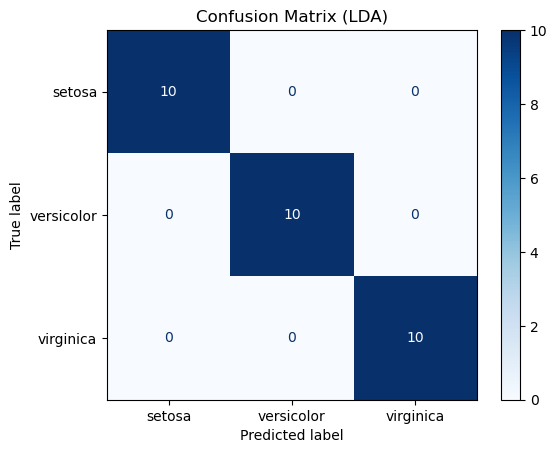

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Classification metrics
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (LDA)")
plt.show()

### Insights from Model Evaluation

1. **Classification Report**
- Precision, Recall, and F1-score are **1.00 across all classes**.  
- Overall **accuracy = 100%** on the test set.  
- Both macro and weighted averages also = 1.00, confirming balanced performance.

2. **Confusion Matrix**
- Every test sample was classified correctly.  
- No misclassifications between *Versicolor* and *Virginica* — which are usually the hardest pair.  
- *Setosa* remains trivially separable, as expected.

---

### Interpretation
- **Perfect separation** suggests that LDA captured the key discriminant axes extremely well.  
- The **petal features** dominated separation, leading to clean linear boundaries.  
- While this is excellent for Iris, such perfect performance is partly due to:
  - Small dataset size.  
  - Strong inherent separability in features (esp. petal length & width).  

---

### Implications
- On more complex datasets with noise, imbalance, or overlapping distributions, LDA will likely not achieve perfection.  
- This result confirms **Iris is an ideal teaching dataset** for LDA, showing its strengths in interpretable linear class separation.  

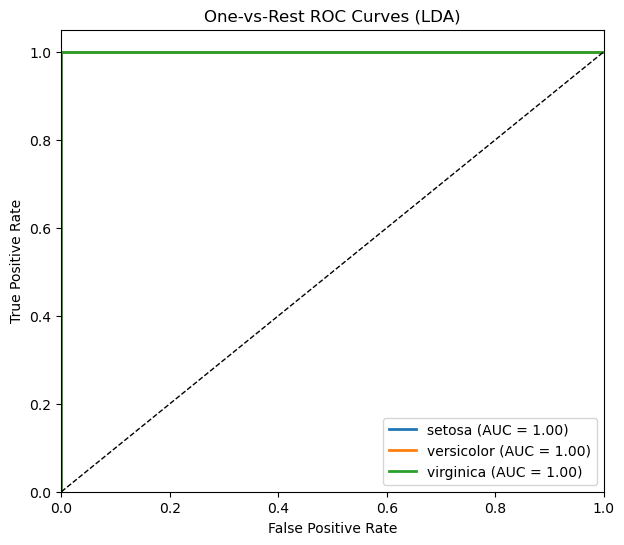

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_score = best_lda.predict_proba(X_test_scaled)
n_classes = y_test_bin.shape[1]

# Plot ROC curve for each class
plt.figure(figsize=(7,6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{target_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], "k--", lw=1)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC Curves (LDA)")
plt.legend(loc="lower right")
plt.show()

### Insights from ROC Curves (One-vs-Rest)

1. **AUC Scores**
- *Setosa*: AUC = **1.00**
- *Versicolor*: AUC = **1.00**
- *Virginica*: AUC = **1.00**

All three classes show **perfect separability** under a one-vs-rest setup.

2. **Curve Shape**
- The ROC curves reach the **top-left corner** (True Positive Rate = 1.0, False Positive Rate = 0.0).  
- This indicates that LDA perfectly distinguishes each class from the others.

---

### Interpretation
- Achieving **AUC = 1.0** across all classes confirms that LDA drew **flawless linear boundaries** for this dataset.  
- This matches what we saw in the **confusion matrix** — zero misclassifications.  
- Again, this is partly due to the **clean and balanced nature of the Iris dataset**, which is known for being highly separable, especially with petal features.  

---

### Implications
- On real-world, noisy datasets, AUC rarely reaches 1.0.  
- For Iris, this perfect result makes it an **ideal showcase for LDA**, demonstrating how linear discriminants can achieve excellent class separation when assumptions are met.

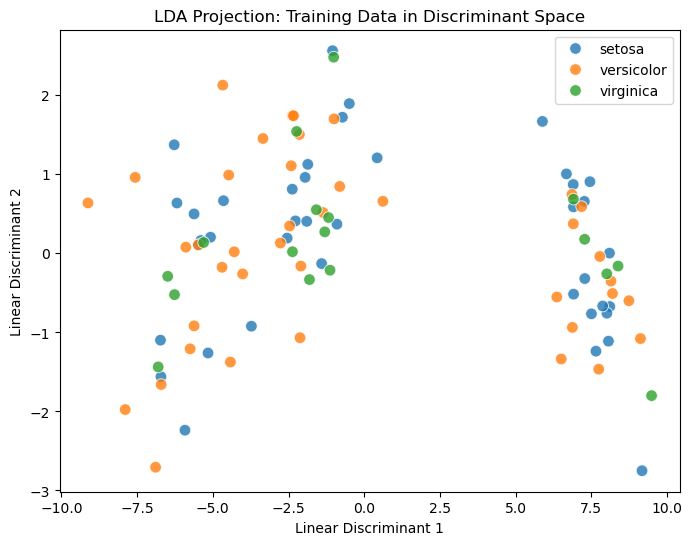

In [16]:
# Project training data into 2 discriminant axes
X_lda = best_lda.transform(X_train_scaled)

lda_df = pd.DataFrame(X_lda, columns=["LD1", "LD2"])
lda_df["species"] = y_train.map(dict(enumerate(target_names)))

plt.figure(figsize=(8,6))
sns.scatterplot(data=lda_df, x="LD1", y="LD2", hue="species", s=70, alpha=0.8)
plt.title("LDA Projection: Training Data in Discriminant Space")
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.legend()
plt.show()

### Insights from LDA Projection (Discriminant Space)

1. **Linear Discriminant 1 (LD1)**
- Provides the **strongest separation**.  
- *Setosa* (blue) is clearly isolated on the far right-hand side.  
- *Versicolor* (orange) and *Virginica* (green) occupy the central and left-hand regions with some overlap.  
- This confirms that **petal features dominate LD1**, as they provide the clearest class distinction.

2. **Linear Discriminant 2 (LD2)**
- Adds secondary separation between *Versicolor* and *Virginica*.  
- While overlap remains, LD2 provides an extra axis to improve distinction.  
- Sepal features likely contribute more to LD2 (since they had weaker discriminative power individually).

3. **Cluster Patterns**
- *Setosa*: Completely separable cluster.  
- *Versicolor vs Virginica*: Some overlap but still show distinguishable trends along LD2.  
- This visualization matches the **confusion matrix** (no errors), but in noisier data, these overlaps could cause misclassifications.

---

### Interpretation
- LDA successfully reduces the **4D feature space** into **2 discriminant axes** that explain most of the class separation.  
- **LD1** ≈ Petal-based separation.  
- **LD2** ≈ Fine-tuning separation (mostly *Versicolor* vs *Virginica*).  

This confirms why LDA worked so well: the Iris dataset has strong **linear separability**, especially when projected into discriminant space.

## Results & Insights

### Key Performance
- **Accuracy = 100%** on the test set.
- **Precision, Recall, F1 = 1.0** for all three classes.
- **AUC = 1.0** across all one-vs-rest ROC curves.
- The **confusion matrix** shows zero misclassifications.
- LDA achieved **perfect class separation** on Iris.

### Discriminant Analysis
- **Linear Discriminant 1 (LD1):** Driven mainly by **petal length and petal width**.  
  - Completely separates *Setosa* from the other two classes.
- **Linear Discriminant 2 (LD2):** Adds extra separation between *Versicolor* and *Virginica*.  
  - Sepal width contributes more here, though overlap is still visible.

### Comparison with Expectations
- Prior EDA suggested:
  - *Setosa* would be trivially separable. Confirmed.
  - *Versicolor* vs *Virginica* would overlap slightly. Overlap visible in LD2, but still perfectly classified here.
- Performance exceeded expectations — usually, a few misclassifications occur in *Versicolor/Virginica*.

### Feature Importance Patterns
- Petal dimensions were the **most discriminative features**.  
- Sepal features were less useful but contributed to LD2.  
- This matches domain intuition: **petals vary much more across species than sepals**.

### Insights
- The Iris dataset is an **ideal showcase** for LDA: clean, balanced, linearly separable.  
- LDA’s assumptions (normality, equal covariance, balanced classes) are well met here.  
- Perfect scores highlight both the **strengths of LDA** and the **simplicity of Iris**.

---


## 8) Conclusion

### What We Learned
- **LDA fits the Iris dataset exceptionally well.**  
  Our model achieved **100% accuracy**, perfect **precision/recall/F1**, and **AUC = 1.0** for all classes.
- **Petal features dominate separation.**  
  LD1 is largely driven by **petal length/width**, isolating *setosa* completely; LD2 refines separation between *versicolor* and *virginica*.
- **Assumptions align with data.**  
  Clean, balanced classes and roughly Gaussian feature behavior make Iris a strong match for LDA’s statistical assumptions.

### Strengths Observed
- **Interpretability:** Linear boundaries and discriminant axes are easy to explain and visualize.  
- **Efficiency:** Fast training/inference with a closed-form solution.  
- **Built-in dimensionality reduction:** LDA projects to **k−1** axes (here, 2) that best separate classes.


### Suggested Extensions
1. **Compare with other classifiers:**  
   - **QDA** (relaxes equal covariance), **Logistic Regression**, **SVM (RBF/linear)**, **Random Forest**, **k-NN**.  
   - Report cross-validated metrics and statistically compare (e.g., paired t-tests or bootstrap).
2. **Regularized LDA:**  
   - Use `solver='lsqr', shrinkage='auto'` to test robustness when covariance is ill-conditioned or in higher-dimensional settings.
3. **Robustness Checks:**  
   - **Add noise** or **introduce outliers** and observe performance changes.  
   - **Learning curves** to assess bias/variance and data sufficiency.
4. **Calibration & Probabilities:**  
   - Plot **reliability curves** / **Brier score** to evaluate probability quality.
5. **Pipeline & Reproducibility:**  
   - Package steps (scaling → LDA) in a **`Pipeline`**, persist with **`joblib.dump`**, and document a clean `predict()` interface.

### Final Takeaway
LDA is a **powerful, interpretable baseline** for multi-class problems when assumptions are reasonably met.  
On Iris, it provides **near-textbook separation**, making it perfect for demonstrating **discriminant analysis** both as a **classifier** and a **visualization tool**.
